<div style="font-size:24px;"><b> Exercices Tests and Limitations </b></div>

<div style="font-size:11pt;"> This section includes automated tests specifically developed to evaluate the performance of the main code. These tests are crucial for assessing how well the programmed exercise interface supports students as they prepare for their FROI exam.</div>

<span style="font-size:14pt; text-decoration:underline;"> The Lists Import </span>

In [1]:
%run ./Dictionnaries.ipynb
%run ./Lists.ipynb

<span style="font-size:14pt; text-decoration:underline;"> The Reactions Functions Import </span>

In [2]:
%run ./Reaction_Functions.ipynb

<span style="font-size:14pt; text-decoration:underline;"> Necessary Import</span>

In [3]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from IPython.display import display
import sys

from rdkit.Chem import PandasTools
import pandas as pd
from pathlib import Path
import os


from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True

<span style="font-size:14pt; text-decoration:underline;"> Complementary Functions </span>

In [4]:
# Function to check if the entered molecule is valid
def validate_smiles(smiles):
    if not smiles:
        return None
    molecule = Chem.MolFromSmiles(smiles)
    if molecule is not None:
        return molecule
    else:
        print("Invalid SMILES string entered.")
        return None

# Function to check for subgroups in start molecules
def subgroup_in_start(mol, Start):
    matched_subgroup = []
    for substr_smiles in Start:
        substructure = Chem.MolFromSmarts(substr_smiles)
        if mol.HasSubstructMatch(substructure):
            matched_subgroup.append(substr_smiles)
            matched_subgroup is not None
    if len(matched_subgroup) == 0:
        print("No Match Found")
        return None 
    else: 
        return matched_subgroup

def subgroup_in_finish(finish_mol, Finish):
    matched_subgroup_f = []
    for substr_smiles in Finish:
        substructure = Chem.MolFromSmarts(substr_smiles)
        if finish_mol.HasSubstructMatch(substructure):
            matched_subgroup_f.append(substr_smiles)
            #print(f"Match found for: {substr_smiles}")

    if len(matched_subgroup_f) == 0:
        print("No Match Found")
        return None 
    else:
        return matched_subgroup_f


# Function to check if condition is in the predefined list
def check_for_cond(condition, Condition):
    for i in range(len(Condition)):
        if condition == Condition[i]:
            return True

def check_same_dict_in_list(start, condition, Reaction):
        globals_dict = globals()  # Get the current global symbol table
        matched_subgroup = subgroup_in_start(start, Start)
        for name in Reaction:
            d = globals_dict.get(name)
            #print(f"Checking dictionary '{name}': {d}")
            if d is not None:
                #print(f"Start in dictionary: {matched_subgroup in d['Start']}")
                #print(f"Condition in dictionary: {condition in d['Condition']}"
                for i in range(len(matched_subgroup)):    
                    if matched_subgroup[i] in d["Start"] and condition in d["Condition"]:
                        return name  # Return the name of the dictionary
        
        return None  # Return None if the dictionaries are not found
    
def check_same_dict_in_list1(start, start2, Reaction):
    globals_dict = globals()  # Get the current global symbol table
    matched_subgroup = subgroup_in_start(start, Start)
    matched_subgroup2 = subgroup_in_start(start2, Start2)
    for name in Reaction:
        d = globals_dict.get(name)
        #print(f"Checking dictionary '{name}': {d}")
        if d is not None:
            for i in range(len(matched_subgroup)):
                for j in range(len(matched_subgroup)):
                    if matched_subgroup[i] in d["Start"] and matched_subgroup2[j] in d["Start2"]:  # Update this line to use the correct keys
                        return name  # Return the name of the dictionary
    
    return None  # Return None if the dictionaries are not found

def check_same_dict_in_list3(finish, condition, Reaction):
    globals_dict = globals()  # Access the global scope
    matched_subgroup = subgroup_in_finish(finish, Finish)
    if not matched_subgroup:
        print("No matching subgroup found.")
        return None
    for name in Reaction:
        d = globals_dict.get(name)
        if d is not None:
            for i in range(len(matched_subgroup)):
                if condition in d["Condition"] and matched_subgroup[i] in d["Finish"]:
                    return name
                else:
                    pass

    return None
    
def check_same_dict_in_list4(condition, finish, finish2, Reaction):
    globals_dict = globals()  # Get the current global symbol table
    matched_subgroup = subgroup_in_finish(finish, Finish)
    matched_subgroup2 = subgroup_in_start(finish2, Finish)
    for name in Reaction:
        d = globals_dict.get(name)
        #print(f"Checking dictionary '{name}': {d}")
        if d is not None:
            for i in range(len(subgroup_in_finish)):
                for j in range(len(subgroup_in_start)):
                    if condition in d["Condition"] and matched_subgroup[i] in d["Finish"] and matched_subgroup2[j] in d["Finish2"]:  # Update this line to use the correct keys
                        return name  # Return the name of the dictionary
    
    return None  # Return None if the dictionaries are not found

def check_same_dict_in_list5(start,start2,condition,Reaction):
    globals_dict = globals()  # Get the current global symbol table
    matched_subgroup = subgroup_in_start(start, Start)
    matched_subgroup2 = subgroup_in_start(start2, Start2)
    for name in Reaction:
        d = globals_dict.get(name)
        #print(f"Checking dictionary '{name}': {d}")
        if d is not None:
            for i in range(len(matched_subgroup)):
                for j in range(len(matched_subgroup2)):
                    if matched_subgroup[i] in d["Start"] and matched_subgroup2[j] in d["Start2"] and condition in d["Condition"]:  # Update this line to use the correct keys
                        return name  # Return the name of the dictionary
                        
def apply_function(dictionary_name, dictionary, start_brut):
    func = function_reaction.get(dictionary_name)
    if func:
        start_input_smiles = start_brut # Get the SMILES string from the dictionary
        #print(f"Calling function {func.__name__} with start_input_smiles: {start_input_smiles}")
        result = func(start_input_smiles)  # Call the function
        return {'result': result, 'dictionary_name': dictionary_name}  # Return a dictionary with both the result and dictionary name
    else:
        raise ValueError(f"No function defined for dictionary '{dictionary_name}'.")

def apply_function2(dictionary_name, dictionary, start_brut, start2_brut):
    func = function_reaction.get(dictionary_name)
    if func:
        start_input_smiles = start_brut  # Get the SMILES string from the dictionary
        start_input_smiles2 = start2_brut
        #print(f"Calling function {func.__name__} with start_input_smiles: {start_input_smiles}")
        result = func(start_input_smiles, start_input_smiles2)  # Call the function
        return {'result': result, 'dictionary_name': dictionary_name}  # Return a dictionary with both the result and dictionary name
    else:
        raise ValueError(f"No function defined for dictionary '{dictionary_name}'.")



<span style="font-size:14pt; text-decoration:underline;"> Exercice Interface </span>

In [5]:
def main():
#for start molecule
    start_brut = input("Initial molecule? Write in SMILES. Else, press Enter")
    start = validate_smiles(start_brut)
    if start:
        if subgroup_in_start(start, Start):
            pass
        else:
            print("The initial molecule you entered cannot be found in our start database.")
#for start molecule 2
    start2_brut = input("Is there a second initial molecule? If not, press Enter")
    start2 = validate_smiles(start2_brut)
    if start2:
        if subgroup_in_start(start2, Start2):  # Pass the molecule object, not the SMILES string
            pass
        else:
            print("The second initial molecule you entered cannot be found in our start database.")
#for conditions
    while True:  # This creates an infinite loop that will continue until explicitly broken out of
        if_condition = input("Conditions? y/n")
        if if_condition.lower() == "y":
            print("Copy paste conditions from the list below")
            print(Condition)
            condition = input("Conditions:")
            if check_for_cond(condition, Condition):
                break  # Exit the loop since the condition is valid
            else:
                print("Condition entered is not in the list. Please try again.")
        elif if_condition.lower() == "n":
            condition = None
            break  # Exit the loop since no conditions are applied
        else:
            print("Invalid input, please enter 'y' for yes or 'n' for no.")
    

    # Handle the final molecule
    finish_brut = input("Final molecule? Write in SMILES. Else, press Enter")
    finish = validate_smiles(finish_brut)
    if finish:
        if subgroup_in_finish(finish, Finish):  # Pass the molecule object, not the SMILES string
            pass
        else:
            print("The final molecule you entered cannot be found in our start database.")
            
    # Handle the second final molecule
    finish2_brut = input("Is there a second final molecule? If not, press Enter")
    finish2 = validate_smiles(finish2_brut)
    if finish2:
        if subgroup_in_finish(finish2, Finish):  # Pass the molecule object, not the SMILES string
            pass
        else:
            print("The final molecule you entered cannot be found in our start database.")
    
    if start and not start2 and condition:
        dictionary_name = check_same_dict_in_list(start, condition, Reaction)
        if dictionary_name: # Check if a dictionary name is found
            result_dict = apply_function(dictionary_name, globals()[dictionary_name], start_brut)
            result = result_dict['result']
            dictionary_name = result_dict['dictionary_name']
            print("Result:", result)
            print("Dictionary name:", dictionary_name)
            print("initial molecule:")
            display(Draw.MolToImage(start))
            print("final molecule:")
            display(Draw.MolToImage(result))
        else:
            print("No matching dictionary found.")
    
    elif start and start2 and condition:
        dictionary_name = check_same_dict_in_list5(start, start2, condition, Reaction)
        if dictionary_name: # Check if a dictionary name is found
            result_dict = apply_function2(dictionary_name, globals()[dictionary_name],start_brut, start2_brut)
            result = result_dict['result']
            dictionary_name = result_dict['dictionary_name']
            print("Result:", result)
            print("Dictionary name:", dictionary_name)
            print("initial molecule:")
            display(Draw.MolToImage(start))
            print("final molecule:")
            display(Draw.MolToImage(result))
        else:
            print("No matching dictionary found.")        
    
    elif start and start2 and not condition:
        dictionary_name = check_same_dict_in_list1(start, start2, Reaction)
        if dictionary_name: # Check if a dictionary name is found
            result_dict = apply_function2(dictionary_name, globals()[dictionary_name],start_brut, start2_brut)
            result = result_dict['result']
            dictionary_name = result_dict['dictionary_name']
            print("Result:", result)
            print("Dictionary name:", dictionary_name)
            print("initial molecule:")
            display(Draw.MolToImage(start))
            print("final molecule:")
            display(Draw.MolToImage(result))
        else:
            print("No matching dictionary found.")

    elif condition and finish:
        dictionary_name = check_same_dict_in_list3(finish, condition, Reaction)
        print("Dictionary name:", dictionary_name)


    elif condition and finish and finish2:
        dictionary_name = check_same_dict_in_list4(condition, finish, finish2, Reaction)
        print("Dictionary name:", dictionary_name)

<span style="font-size:14pt; text-decoration:underline;"> Test 1 </span>

Initial molecule? Write in SMILES. Else, press Enter C1cCC(=O)CC1
Is there a second initial molecule? If not, press Enter 
Conditions? y/n y


Copy paste conditions from the list below
['Base and Nucleophile', 'Acid and Nucleophile', 'H2O and acid', ' H+ and 1equiv MeOH', 'H+ and 2equiv MeOH', 'Acid', 'pH>6', '4<pH<6', 'Base', 'OCCS(=O)(=O)[O-].[Na+]', 'S(=O)(=O)[O-].[Na+]', 'NH3, HCN', 'HCN, LiAlH4', 'H+,H2O', 'HCN', 'C2OOH', 'Base', 'H-', 'NaBH4, -78°C', 'NaBH4, CeCl3, MeOH', 'LiAlH4, 2 équiv.', 'LiAlH4', 'H+, NaBH3CN', 'NH2NH2, KOH, 180°C', 'Zn(Hg), HCl, reflux', 'Al(OR)3', 'SmI2, THF, -10°C', 'KOH, reflux', 'CN-, EtOH, H2O', 'KCN (0,3 equiv), 18-C-6 (0,1 equiv)', 'Catalyst: CN', 'Al(iPr)3', 'KHMDS, 18-Crown-6, -78°C', 'H+']


Conditions: NH2NH2, KOH, 180°C
Final molecule? Write in SMILES. Else, press Enter 
Is there a second final molecule? If not, press Enter 


Result: <rdkit.Chem.rdchem.Mol object at 0x148dca2d0>
Dictionary name: wolf_kishner_huang_reduction
initial molecule:


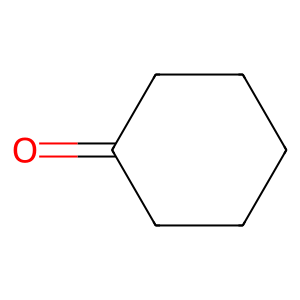

final molecule:


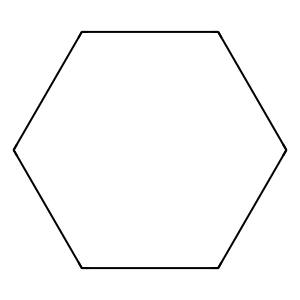

In [6]:
if __name__ == "__main__":
    main()

<span style="font-size:14pt; text-decoration:underline;"> Test 2 </span>

<div style="font-size:11pt;"> In case the input start molecule and the conditions correspond to a reaction that hasn't been coded yet, the code will still give a hint about the reaction's name. </div>

In [ ]:
if __name__ == "__main__":
    main()

Initial molecule? Write in SMILES. Else, press Enter CC(=O)CC
Is there a second initial molecule? If not, press Enter 
Conditions? y/n y


Copy paste conditions from the list below
['Base and Nucleophile', 'Acid and Nucleophile', 'H2O and acid', ' H+ and 1equiv MeOH', 'H+ and 2equiv MeOH', 'Acid', 'pH>6', '4<pH<6', 'Base', 'OCCS(=O)(=O)[O-].[Na+]', 'S(=O)(=O)[O-].[Na+]', 'NH3, HCN', 'HCN, LiAlH4', 'H+,H2O', 'HCN', 'C2OOH', 'Base', 'H-', 'NaBH4, -78°C', 'NaBH4, CeCl3, MeOH', 'LiAlH4, 2 équiv.', 'LiAlH4', 'H+, NaBH3CN', 'NH2NH2, KOH, 180°C', 'Zn(Hg), HCl, reflux', 'Al(OR)3', 'SmI2, THF, -10°C', 'KOH, reflux', 'CN-, EtOH, H2O', 'KCN (0,3 equiv), 18-C-6 (0,1 equiv)', 'Catalyst: CN', 'Al(iPr)3', 'KHMDS, 18-Crown-6, -78°C', 'H+']


Conditions: Base and Nucleophile
Final molecule? Write in SMILES. Else, press Enter 
Is there a second final molecule? If not, press Enter 


<span style="font-size:14pt; text-decoration:underline;"> Test 3 </span>

<div style="font-size:11pt;"> The limitation of this code is that it lacks in flexibility since the conditions are strings contained in a list; even a change of space can disrupt the code. The code will ask to re-write the conditions. </div>

Initial molecule? Write in SMILES. Else, press Enter CCCC(=O)CC
Is there a second initial molecule? If not, press Enter 
Conditions? y/n y


Copy paste conditions from the list below
['Base and Nucleophile', 'Acid and Nucleophile', 'H2O and acid', ' H+ and 1equiv MeOH', 'H+ and 2equiv MeOH', 'Acid', 'pH>6', '4<pH<6', 'Base', 'OCCS(=O)(=O)[O-].[Na+]', 'S(=O)(=O)[O-].[Na+]', 'NH3, HCN', 'HCN, LiAlH4', 'H+,H2O', 'HCN', 'C2OOH', 'Base', 'H-', 'NaBH4, -78°C', 'NaBH4, CeCl3, MeOH', 'LiAlH4, 2 équiv.', 'LiAlH4', 'H+, NaBH3CN', 'NH2NH2, KOH, 180°C', 'Zn(Hg), HCl, reflux', 'Al(OR)3', 'SmI2, THF, -10°C', 'KOH, reflux', 'CN-, EtOH, H2O', 'KCN (0,3 equiv), 18-C-6 (0,1 equiv)', 'Catalyst: CN', 'Al(iPr)3', 'KHMDS, 18-Crown-6, -78°C', 'H+']


Conditions: NH2NH2,180°C


Condition entered is not in the list. Please try again.


Conditions? y/n y


Copy paste conditions from the list below
['Base and Nucleophile', 'Acid and Nucleophile', 'H2O and acid', ' H+ and 1equiv MeOH', 'H+ and 2equiv MeOH', 'Acid', 'pH>6', '4<pH<6', 'Base', 'OCCS(=O)(=O)[O-].[Na+]', 'S(=O)(=O)[O-].[Na+]', 'NH3, HCN', 'HCN, LiAlH4', 'H+,H2O', 'HCN', 'C2OOH', 'Base', 'H-', 'NaBH4, -78°C', 'NaBH4, CeCl3, MeOH', 'LiAlH4, 2 équiv.', 'LiAlH4', 'H+, NaBH3CN', 'NH2NH2, KOH, 180°C', 'Zn(Hg), HCl, reflux', 'Al(OR)3', 'SmI2, THF, -10°C', 'KOH, reflux', 'CN-, EtOH, H2O', 'KCN (0,3 equiv), 18-C-6 (0,1 equiv)', 'Catalyst: CN', 'Al(iPr)3', 'KHMDS, 18-Crown-6, -78°C', 'H+']


Conditions: NH2NH2,KOH,180°C


Condition entered is not in the list. Please try again.


Conditions? y/n y


Copy paste conditions from the list below
['Base and Nucleophile', 'Acid and Nucleophile', 'H2O and acid', ' H+ and 1equiv MeOH', 'H+ and 2equiv MeOH', 'Acid', 'pH>6', '4<pH<6', 'Base', 'OCCS(=O)(=O)[O-].[Na+]', 'S(=O)(=O)[O-].[Na+]', 'NH3, HCN', 'HCN, LiAlH4', 'H+,H2O', 'HCN', 'C2OOH', 'Base', 'H-', 'NaBH4, -78°C', 'NaBH4, CeCl3, MeOH', 'LiAlH4, 2 équiv.', 'LiAlH4', 'H+, NaBH3CN', 'NH2NH2, KOH, 180°C', 'Zn(Hg), HCl, reflux', 'Al(OR)3', 'SmI2, THF, -10°C', 'KOH, reflux', 'CN-, EtOH, H2O', 'KCN (0,3 equiv), 18-C-6 (0,1 equiv)', 'Catalyst: CN', 'Al(iPr)3', 'KHMDS, 18-Crown-6, -78°C', 'H+']


Conditions: NH2NH2, KOH, 180°C
Final molecule? Write in SMILES. Else, press Enter 
Is there a second final molecule? If not, press Enter 


Result: <rdkit.Chem.rdchem.Mol object at 0x148e0bd10>
Dictionary name: wolf_kishner_huang_reduction
initial molecule:


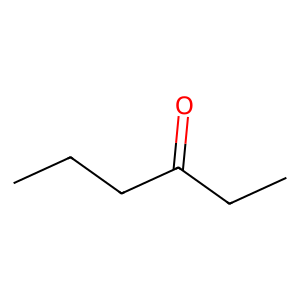

final molecule:


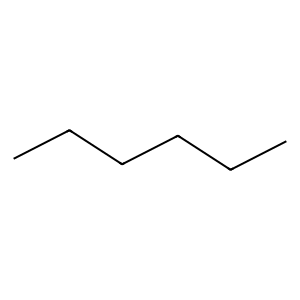

In [7]:
if __name__ == "__main__":
    main()

<span style="font-size:14pt; text-decoration:underline;"> Test 4 </span>

<div style="font-size:11pt;"> The initial molecule must be input in a valid Smiles version otherwise the code isn't unable to read the input information. </div>

In [26]:
if __name__ == "__main__":
    main()

Initial molecule? Write in SMILES. Else, press Enter c1c1CC(=O)C1CCCCC1


[14:40:57] SMILES Parse Error: ring closure 1 duplicates bond between atom 0 and atom 1 for input: 'c1c1CC(=O)C1CCCCC1'


Invalid SMILES string entered.


Is there a second initial molecule? If not, press Enter 
Conditions? y/n n
Final molecule? Write in SMILES. Else, press Enter 
Is there a second final molecule? If not, press Enter 
